# Task-5:- Sales Data Analysis

**Objective**:- Analyse sales data using pandas

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
from google.colab import files
uploaded=files.upload()

Saving sales_data_sample.csv to sales_data_sample (1).csv


In [12]:
df=pd.read_csv("sales_data_sample.csv",encoding="latin1")
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


#Step 1:-Load and explore data

Load the csv and display the first few rows to understand the structure.

In [13]:
print(df.shape)
print(df.info())
print(df.isnull().sum())

(2823, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null 

#Step 2:- Basic exploration

Check how many rows and columns the dataset has, and if there are any missing values.

In [14]:
invalid_values=["-","?","!!@#$%^&*","NANANANA"]
df=df.replace(invalid_values,np.nan)
df=df.dropna()

#Step 3:- Analyse sales by group

Analyse sales by productline,country and month.

In [15]:
sales_by_product=df.groupby('PRODUCTLINE')['SALES'].sum()
sales_by_country=df.groupby('COUNTRY')['SALES'].sum()
df['ORDERDATE']=pd.to_datetime(df['ORDERDATE'])
df['Month']=df['ORDERDATE'].dt.to_period('M')
monthly_sales=df.groupby('Month')['SALES'].sum()

#Step 4:- Visualizations

Create charts to visualize the grouped data.

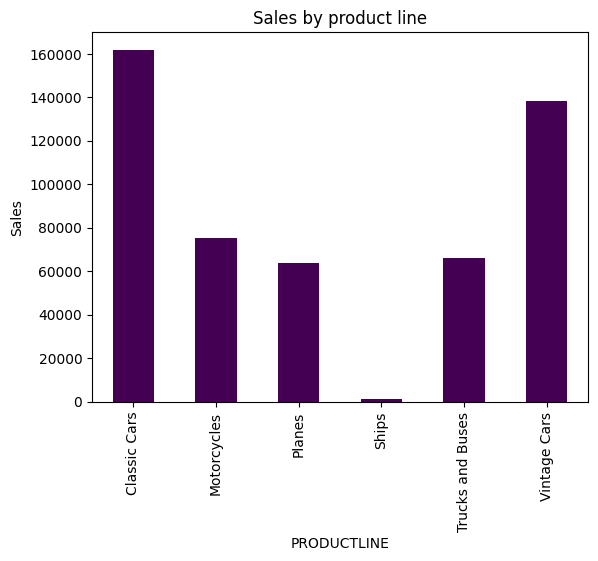

In [16]:
sales_by_product.plot(kind='bar',title="Sales by product line",colormap='viridis')
plt.ylabel("Sales")
plt.show()

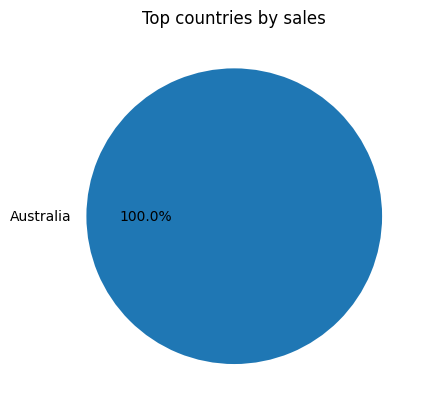

In [19]:
sales_by_country.head(10).plot(kind='pie',autopct='%1.1f%%',title='Top countries by sales')
plt.ylabel("")
plt.show()

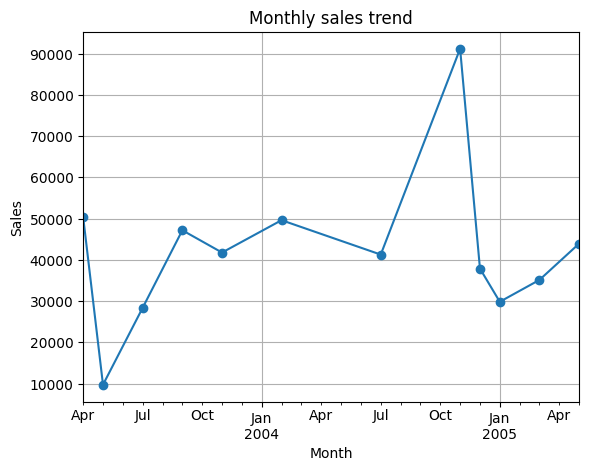

In [18]:
monthly_sales.plot(kind='line',marker='o',title='Monthly sales trend')
plt.ylabel('Sales')
plt.xlabel('Month')
plt.grid(True)
plt.show()

#Step 5:- Key Insights

-**Classic cars** has the highest sales.
-Sales came from Australia
-Sales peak in the month of October.

#Conclusion

Successfully used pandas and matplotlib to analyse and visualize sales data.It can help drive business decisions.